In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install shapely

  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/63/05/8a1c279c226d6ad7604d9e237713dd21788eab96db97bf4ce0ea565e5596/shapely-2.0.7-cp312-cp312-win_amd64.whl.metadata
  Using cached shapely-2.0.7-cp312-cp312-win_amd64.whl.metadata (7.1 kB)
Using cached shapely-2.0.7-cp312-cp312-win_amd64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
response = {
    "rafter_dist": 2,
    "ridge_pts": [
        [
            903.3977348434377,
            595.6029313790806
        ],
        [
            435.709526982012,
            648.5676215856096
        ]
    ],
    "eve_pts": [
        [
            460.692871419054,
            866.4223850766156
        ],
        [
            830.4463690872751,
            818.454363757495
        ]
    ],
    "mt_per_px": 0.06431112342582257,
    "roof_pts": [
        {
            "x": 903.3977348434377,
            "y": 595.6029313790806
        },
        {
            "x": 435.709526982012,
            "y": 648.5676215856096
        },
        {
            "x": 460.692871419054,
            "y": 866.4223850766156
        },
        {
            "x": 830.4463690872751,
            "y": 818.454363757495
        },
        {
            "x": 816.4556962025316,
            "y": 715.5229846768821
        },
        {
            "x": 905.396402398401,
            "y": 700.5329780146569
        },
        {
            "x": 903.3977348434377,
            "y": 595.6029313790806
        }
    ]
}

In [5]:
from shapely import geometry

# Convert roof_pts to a list of tuples

data = [[918.3877415056628, 578.614257161892], [398.73417721518985, 591.6055962691539]]
# Ensure the polygon is closed by repeating the first point at the end
data.append(data[0])
# roof_pts = [(pt['x'], pt['y']) for pt in response['roof_pts']]
poly = geometry.Polygon(data)

poly

line_pts = data
dist = ( (line_pts[1][0] - line_pts[0][0])**2 + (line_pts[1][1] - line_pts[0][1])**2 )**0.5

dist 

519.8159306635308

In [6]:
rafter_calc_res = {
  "points": {
    "count": 24,
    "points": [
      [
        884.5603055737741,
        597.7362299929528
      ],
      [
        865.7228763041106,
        599.8695286068249
      ],
      [
        846.8854470344471,
        602.002827220697
      ],
      [
        828.0480177647836,
        604.1361258345692
      ],
      [
        809.2105884951201,
        606.2694244484413
      ],
      [
        790.3731592254566,
        608.4027230623135
      ],
      [
        771.5357299557929,
        610.5360216761857
      ],
      [
        752.6983006861295,
        612.6693202900578
      ],
      [
        733.860871416466,
        614.8026189039299
      ],
      [
        715.0234421468025,
        616.9359175178021
      ],
      [
        696.186012877139,
        619.0692161316742
      ],
      [
        677.3485836074755,
        621.2025147455464
      ],
      [
        658.511154337812,
        623.3358133594186
      ],
      [
        639.6737250681484,
        625.4691119732908
      ],
      [
        620.8362957984849,
        627.6024105871628
      ],
      [
        601.9988665288215,
        629.735709201035
      ],
      [
        583.1614372591579,
        631.8690078149071
      ],
      [
        564.3240079894945,
        634.0023064287793
      ],
      [
        545.486578719831,
        636.1356050426515
      ],
      [
        526.6491494501673,
        638.2689036565237
      ],
      [
        507.81172018050387,
        640.4022022703957
      ],
      [
        488.9742909108403,
        642.5355008842679
      ],
      [
        470.13686164117684,
        644.6687994981401
      ],
      [
        451.2994323715133,
        646.8020981120122
      ]
    ]
  },
  "rafters_tips": [
    [
      908.4107401040126,
      808.3400669769452
    ],
    [
      889.6079624885174,
      810.7793462351716
    ],
    [
      870.8051848730222,
      813.218625493398
    ],
    [
      852.002407257527,
      815.6579047516244
    ],
    [
      833.1996296420317,
      818.0971840098508
    ],
    [
      814.3968520265365,
      820.5364632680772
    ],
    [
      795.5940744110413,
      822.9757425263036
    ],
    [
      776.7912967955463,
      825.41502178453
    ],
    [
      757.9885191800511,
      827.8543010427564
    ],
    [
      739.1857415645559,
      830.2935803009829
    ],
    [
      720.3829639490607,
      832.7328595592093
    ],
    [
      701.5801863335654,
      835.1721388174357
    ],
    [
      682.7774087180703,
      837.6114180756621
    ],
    [
      663.9746311025751,
      840.0506973338885
    ],
    [
      645.1718534870799,
      842.4899765921149
    ],
    [
      626.3690758715848,
      844.9292558503413
    ],
    [
      607.5662982560895,
      847.3685351085677
    ],
    [
      588.7635206405944,
      849.8078143667941
    ],
    [
      569.9607430250992,
      852.2470936250205
    ],
    [
      551.1579654096039,
      854.6863728832469
    ],
    [
      532.3551877941088,
      857.1256521414732
    ],
    [
      513.5524101786135,
      859.5649313996997
    ],
    [
      494.7496325631184,
      862.004210657926
    ],
    [
      475.9468549476232,
      864.4434899161524
    ]
  ],
  "status": True
}


In [7]:
# ridge_pts = response['ridge_pts']
# eve_pts = response['eve_pts']

# # ridge_idx_1 = 0
# # ridge_idx_2 = 0

# # eve_idx_1 = 0
# # eve_idx_2 = 0
def get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts):
    pt_locations = {
        "r1": -1, 
        "r2": -1,
        "e1" : -1, 
        "e2": -1
    }
    
    for idx in range(len(roof_pts)):
        roof_pt = roof_pts[idx]
        x, y = roof_pt['x'], roof_pt['y']
        
        if(x==ridge_pts[0][0]) & (y==ridge_pts[0][1]):
            pt_locations['r1'] = idx if pt_locations['r1']==-1 else pt_locations['r1']
        if(x==ridge_pts[1][0]) & (y==ridge_pts[1][1]):
            pt_locations['r2'] = idx if pt_locations['r2']==-1 else pt_locations['r2']
        if(x==eve_pts[0][0]) & (y==eve_pts[0][1]):
            pt_locations['e1'] = idx if pt_locations['e1']==-1 else pt_locations['e1']
        if(x==eve_pts[1][0]) & (y==eve_pts[1][1]):
            pt_locations['e2'] =idx if pt_locations['e2']==-1 else pt_locations['e2']
    
    return pt_locations


# roof pts

In [8]:
# roof_pts = response['roof_pts']


In [9]:
# pt_locations = get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts)

In [10]:

# ridge_eve = [ (pt_locations['r1'], pt_locations['r2']),  (pt_locations['e1'], pt_locations['e2'])] 
# ridge_eve

In [11]:
# pts_idx = list(range(1, len(roof_pts)))
# line_segments = list(enumerate(pts_idx))
# line_segments = [i for i in line_segments if i not in ridge_eve]
# line_segments

In [12]:
# def seggrate_lines(no_of_roof_pts):
#     pts_idx = list(range(1, no_of_roof_pts))
#     line_segments = list(enumerate(pts_idx))
#     line_segments = [i for i in line_segments if i not in ridge_eve]
#     line_segments

### from above we are able bring all the line segmet point indices which are not part of ridge or eve

## Making Rafter Line segments

In [13]:
# no_of_rafters = len(rafter_calc_res['points']['points'])

In [14]:
# rafter_start_pts = rafter_calc_res['points']['points']
# rafter_tips = rafter_calc_res['rafters_tips']

In [15]:
# no_of_rafters

In [16]:
# rafter_lines = [ [rafter_start_pts[i], rafter_tips[i]] for i in range(no_of_rafters) ]

1. step1: check weather the rafter line is cutting any of the remaining lines in the roof plane
2. step2: check if the starting point is on rafter and also endoing point is on rafter


assuming the rafter meets only one side in the entire set of sides. 

```
get the rafter, ridge, eve
if rafter_start, rafter_end are in ridge and eve:
    pass
else:
    check the start is in ridge or end is on ridge:
        if start is in ridge:
            find poi of other end with any other side.

 
```

In [17]:
def extract_x_y(line_pts):
    line_pts = np.array(line_pts)
    return line_pts[:, :1].flatten(), line_pts[:, 1:].flatten()

In [18]:
def calc_distance(point):

    dist = ( (point[1][0] - point[0][0])**2 + (point[1][1] - point[0][1])**2 )**0.5
    return dist

In [19]:
def calc_poi(line_1, line_2):
    line_1 = np.array(line_1)
    line_2_x, line_2_y = extract_x_y(line_2)

    line_2 = np.array(line_2)
    line_1_x, line_1_y = extract_x_y(line_1)

    line_2_dx = line_2_x[1] - line_2_x[0]
    line_2_dy = line_2_y[1] - line_2_y[0]

    line_1_dx = line_1_x[1] - line_1_x[0]
    line_1_dy = line_1_y[1] - line_1_y[0]

    line_2_slope = line_2_dy / line_2_dx
    line_1_slope = line_1_dy / line_1_dx

    line_1_c = line_1_y[0] - (line_1_slope * line_1_x[0])
    line_2_c = line_2_y[0] - (line_2_slope * line_2_x[0])

    x = (line_1_c - line_2_c) / (line_2_slope - line_1_slope)
    y = (line_2_slope*x) + line_2_c

    return x, y

A-----c---------------B  



A--------------B------c


c----A----------------B


    c
A--------------------B

In [20]:
def check_point_bwn_AB(point, line, tolerence=0.0000000001):
    A = line[0]
    B = line[1]
    AC = calc_distance([A, point])
    BC = calc_distance([B, point])
    AB = calc_distance(line)

    status = (AB <= AC+BC+tolerence) & (AB >= (AC+BC)-tolerence)
    return status

### Step 1

In [21]:
ridge_pts = response['ridge_pts']
eve_pts = response['eve_pts']
roof_pts = response['roof_pts']

pt_locations = get_ridge_eve_indices(roof_pts, ridge_pts, eve_pts)
pt_locations

{'r1': 0, 'r2': 1, 'e1': 2, 'e2': 3}

### Step 2

In [22]:
rafter_start_pts = rafter_calc_res['points']['points']
rafter_tips = rafter_calc_res['rafters_tips']

In [23]:
def seggrate_lines(no_of_roof_pts, pt_locations):
    ridge_eve = [ (pt_locations['r1'], pt_locations['r2']),  (pt_locations['e1'], pt_locations['e2'])] 
    pts_idx = list(range(1, no_of_roof_pts))
    line_segments = list(enumerate(pts_idx))
    line_segments = [i for i in line_segments if i not in ridge_eve]
    return {"ridge_eve": ridge_eve, "line_segments": line_segments }

### Seggregation of Lines

In [24]:
line_seggregation = seggrate_lines(len(roof_pts), pt_locations)
ridge_eve = line_seggregation.get('ridge_eve', [])
line_segments = line_seggregation.get('line_segments', [])
ridge_eve, line_segments

([(0, 1), (2, 3)], [(1, 2), (3, 4), (4, 5), (5, 6)])

### creating rafter lines

In [25]:
no_of_rafters = len(rafter_start_pts)

In [26]:
rafter_lines = [ [rafter_start_pts[i], rafter_tips[i]] for i in range(no_of_rafters) ]
# # rafter_lines

In [27]:
def recalc_rafters(rafter_lines , ridge_pts, eve_pts, roof_pts, ):
    new_rafters = []

    no_of_rafters = len(rafter_lines)
    for rafter in rafter_lines:
       
    
        rafter_start, rafter_end = rafter[0], rafter[1]
    
        raf_start_is_ridge = check_point_bwn_AB(rafter_start, ridge_pts)
        raf_start_is_eve = check_point_bwn_AB(rafter_start, eve_pts)
        raf_end_is_ridge = check_point_bwn_AB(rafter_end, ridge_pts)
        raf_end_is_eve = check_point_bwn_AB(rafter_end, eve_pts)
    
        if( (raf_start_is_ridge & raf_end_is_eve) | (raf_start_is_eve & raf_end_is_ridge) ):
            new_rafter = rafter
            new_rafters.append(new_rafter)
        else:
            for line in  line_segments:
                line_start = [roof_pts[line[0]]['x'], roof_pts[line[0]]['y']]
                line_end = [roof_pts[line[1]]['x'], roof_pts[line[1]]['y']]
    
                side = [ line_start, line_end ]
                assumption_poi = calc_poi(side, rafter)
                if (raf_start_is_ridge & (not raf_end_is_eve)):
                    if(check_point_bwn_AB(assumption_poi, side)):
                        new_rafter = [rafter_start, assumption_poi]
                        new_rafters.append(new_rafter)
                        break
                    # change the rafter end 
                elif ((not raf_start_is_ridge) & (raf_end_is_eve)):
                    # change the rafter start
                    if(check_point_bwn_AB(assumption_poi, side)):
                        new_rafter = [assumption_poi, rafter_end]
                        new_rafters.append(new_rafter)
                        break;
    return new_rafters

        
        

In [28]:
new_rafters = recalc_rafters(rafter_lines, ridge_pts, eve_pts, roof_pts)

In [29]:
ridge_pts

[[903.3977348434377, 595.6029313790806], [435.709526982012, 648.5676215856096]]

In [30]:
# ridge_pts

In [31]:
r_x, r_y = extract_x_y(ridge_pts)

raf_x, raf_y = extract_x_y(rafter_start_pts)

e_x, e_y = extract_x_y(eve_pts)

raf_eve_x, raf_eve_y = extract_x_y(rafter_tips)

new_rdge_pts_x, new_rdge_pts_y = extract_x_y(new_rafters)
 
# exp_x, exp_y = extract_x_y(calc_projection(sides['eve'], sides['ridge']))

C:\Users\IL010549\AppData\Local\Temp\ipykernel_6084\3407888984.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


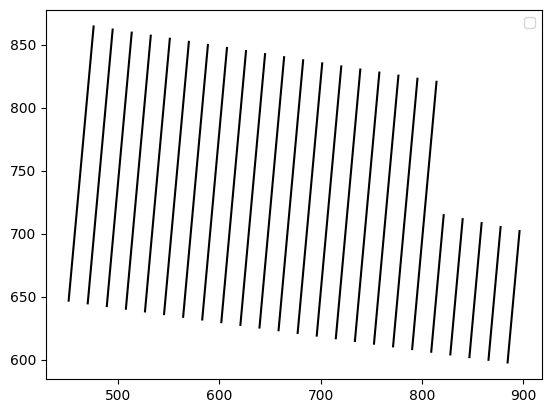

In [32]:
def plot_img():

    
    for i in new_rafters:
        _x, _y = extract_x_y(i)
        plt.plot(_x, _y, color='black')
        # for i in range(len(new_rafters) - 1):
        #     rail_start = new_rafters[i][1]
        #     rail_end = new_rafters[i + 1][1]
        #     x , y = extract_x_y(rail_start) ,  extract_x_y(rail_end)
        #     plt.plot(x, y, color='black')
            # plt.plot(rail_start , rail_end, color='black')
            # rails.append([rail_start, rail_end])

    plt.legend()
    

plot_img()

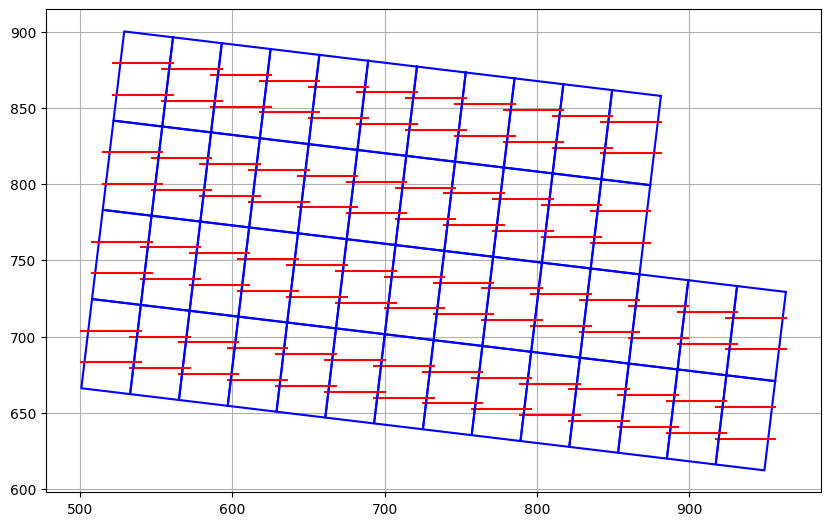

In [33]:
modules =  [
        [
            {
                "x": 956.5013165087562,
                "y": 670.7304163557283
            },
            {
                "x": 949.4595759569696,
                "y": 612.1330753355032
            },
            {
                "x": 917.4065634839964,
                "y": 615.9849394953462
            },
            {
                "x": 924.4483040357829,
                "y": 674.5822805155706
            }
        ],
        [
            {
                "x": 924.4483040357829,
                "y": 674.5822805155706
            },
            {
                "x": 917.4065634839964,
                "y": 615.9849394953462
            },
            {
                "x": 885.3535510110232,
                "y": 619.8368036551883
            },
            {
                "x": 892.3952915628097,
                "y": 678.4341446754128
            }
        ],
        [
            {
                "x": 892.3952915628097,
                "y": 678.4341446754128
            },
            {
                "x": 885.3535510110232,
                "y": 619.8368036551883
            },
            {
                "x": 853.30053853805,
                "y": 623.6886678150313
            },
            {
                "x": 860.3422790898364,
                "y": 682.2860088352551
            }
        ],
        [
            {
                "x": 860.3422790898364,
                "y": 682.2860088352551
            },
            {
                "x": 853.30053853805,
                "y": 623.6886678150313
            },
            {
                "x": 821.2475260650766,
                "y": 627.5405319748725
            },
            {
                "x": 828.2892666168632,
                "y": 686.1378729950974
            }
        ],
        [
            {
                "x": 828.2892666168632,
                "y": 686.1378729950974
            },
            {
                "x": 821.2475260650766,
                "y": 627.5405319748725
            },
            {
                "x": 789.1945135921034,
                "y": 631.3923961347155
            },
            {
                "x": 796.2362541438899,
                "y": 689.9897371549397
            }
        ],
        [
            {
                "x": 796.2362541438899,
                "y": 689.9897371549397
            },
            {
                "x": 789.1945135921034,
                "y": 631.3923961347155
            },
            {
                "x": 757.1415011191301,
                "y": 635.2442602945575
            },
            {
                "x": 764.1832416709167,
                "y": 693.8416013147819
            }
        ],
        [
            {
                "x": 764.1832416709167,
                "y": 693.8416013147819
            },
            {
                "x": 757.1415011191301,
                "y": 635.2442602945575
            },
            {
                "x": 725.088488646157,
                "y": 639.0961244544005
            },
            {
                "x": 732.1302291979434,
                "y": 697.6934654746242
            }
        ],
        [
            {
                "x": 732.1302291979434,
                "y": 697.6934654746242
            },
            {
                "x": 725.088488646157,
                "y": 639.0961244544005
            },
            {
                "x": 693.0354761731837,
                "y": 642.9479886142426
            },
            {
                "x": 700.0772167249702,
                "y": 701.5453296344665
            }
        ],
        [
            {
                "x": 700.0772167249702,
                "y": 701.5453296344665
            },
            {
                "x": 693.0354761731837,
                "y": 642.9479886142426
            },
            {
                "x": 660.9824637002105,
                "y": 646.7998527740856
            },
            {
                "x": 668.0242042519969,
                "y": 705.3971937943088
            }
        ],
        [
            {
                "x": 668.0242042519969,
                "y": 705.3971937943088
            },
            {
                "x": 660.9824637002105,
                "y": 646.7998527740856
            },
            {
                "x": 628.9294512272371,
                "y": 650.6517169339268
            },
            {
                "x": 635.9711917790237,
                "y": 709.2490579541511
            }
        ],
        [
            {
                "x": 635.9711917790237,
                "y": 709.2490579541511
            },
            {
                "x": 628.9294512272371,
                "y": 650.6517169339268
            },
            {
                "x": 596.876438754264,
                "y": 654.5035810937688
            },
            {
                "x": 603.9181793060504,
                "y": 713.1009221139933
            }
        ],
        [
            {
                "x": 603.9181793060504,
                "y": 713.1009221139933
            },
            {
                "x": 596.876438754264,
                "y": 654.5035810937688
            },
            {
                "x": 564.8234262812907,
                "y": 658.3554452536118
            },
            {
                "x": 571.8651668330772,
                "y": 716.9527862738356
            }
        ],
        [
            {
                "x": 571.8651668330772,
                "y": 716.9527862738356
            },
            {
                "x": 564.8234262812907,
                "y": 658.3554452536118
            },
            {
                "x": 532.7704138083175,
                "y": 662.2073094134544
            },
            {
                "x": 539.8121543601039,
                "y": 720.8046504336779
            }
        ],
        [
            {
                "x": 539.8121543601039,
                "y": 720.8046504336779
            },
            {
                "x": 532.7704138083175,
                "y": 662.2073094134544
            },
            {
                "x": 500.71740133534405,
                "y": 666.059173573296
            },
            {
                "x": 507.75914188713057,
                "y": 724.6565145935202
            }
        ],
        [
            {
                "x": 963.5430570605428,
                "y": 729.3277573759519
            },
            {
                "x": 956.5013165087563,
                "y": 670.7304163557283
            },
            {
                "x": 924.448304035783,
                "y": 674.5822805155703
            },
            {
                "x": 931.4900445875695,
                "y": 733.1796215357942
            }
        ],
        [
            {
                "x": 931.4900445875695,
                "y": 733.1796215357942
            },
            {
                "x": 924.448304035783,
                "y": 674.5822805155703
            },
            {
                "x": 892.3952915628097,
                "y": 678.4341446754124
            },
            {
                "x": 899.4370321145963,
                "y": 737.0314856956364
            }
        ],
        [
            {
                "x": 899.4370321145963,
                "y": 737.0314856956364
            },
            {
                "x": 892.3952915628097,
                "y": 678.4341446754124
            },
            {
                "x": 860.3422790898366,
                "y": 682.2860088352545
            },
            {
                "x": 867.384019641623,
                "y": 740.8833498554787
            }
        ],
        [
            {
                "x": 867.384019641623,
                "y": 740.8833498554787
            },
            {
                "x": 860.3422790898366,
                "y": 682.2860088352545
            },
            {
                "x": 828.2892666168633,
                "y": 686.1378729950975
            },
            {
                "x": 835.3310071686498,
                "y": 744.735214015321
            }
        ],
        [
            {
                "x": 835.3310071686498,
                "y": 744.735214015321
            },
            {
                "x": 828.2892666168633,
                "y": 686.1378729950975
            },
            {
                "x": 796.2362541438902,
                "y": 689.9897371549396
            },
            {
                "x": 803.2779946956765,
                "y": 748.5870781751634
            }
        ],
        [
            {
                "x": 803.2779946956765,
                "y": 748.5870781751634
            },
            {
                "x": 796.2362541438902,
                "y": 689.9897371549396
            },
            {
                "x": 764.1832416709168,
                "y": 693.8416013147817
            },
            {
                "x": 771.2249822227033,
                "y": 752.4389423350055
            }
        ],
        [
            {
                "x": 771.2249822227033,
                "y": 752.4389423350055
            },
            {
                "x": 764.1832416709168,
                "y": 693.8416013147817
            },
            {
                "x": 732.1302291979434,
                "y": 697.6934654746237
            },
            {
                "x": 739.17196974973,
                "y": 756.2908064948479
            }
        ],
        [
            {
                "x": 739.17196974973,
                "y": 756.2908064948479
            },
            {
                "x": 732.1302291979434,
                "y": 697.6934654746237
            },
            {
                "x": 700.0772167249702,
                "y": 701.5453296344667
            },
            {
                "x": 707.1189572767566,
                "y": 760.1426706546902
            }
        ],
        [
            {
                "x": 707.1189572767566,
                "y": 760.1426706546902
            },
            {
                "x": 700.0772167249702,
                "y": 701.5453296344667
            },
            {
                "x": 668.0242042519969,
                "y": 705.3971937943088
            },
            {
                "x": 675.0659448037834,
                "y": 763.9945348145325
            }
        ],
        [
            {
                "x": 675.0659448037834,
                "y": 763.9945348145325
            },
            {
                "x": 668.0242042519969,
                "y": 705.3971937943088
            },
            {
                "x": 635.9711917790238,
                "y": 709.2490579541518
            },
            {
                "x": 643.0129323308101,
                "y": 767.8463989743748
            }
        ],
        [
            {
                "x": 643.0129323308101,
                "y": 767.8463989743748
            },
            {
                "x": 635.9711917790238,
                "y": 709.2490579541518
            },
            {
                "x": 603.9181793060505,
                "y": 713.1009221139939
            },
            {
                "x": 610.9599198578369,
                "y": 771.698263134217
            }
        ],
        [
            {
                "x": 610.9599198578369,
                "y": 771.698263134217
            },
            {
                "x": 603.9181793060505,
                "y": 713.1009221139939
            },
            {
                "x": 571.8651668330773,
                "y": 716.952786273836
            },
            {
                "x": 578.9069073848636,
                "y": 775.5501272940593
            }
        ],
        [
            {
                "x": 578.9069073848636,
                "y": 775.5501272940593
            },
            {
                "x": 571.8651668330773,
                "y": 716.952786273836
            },
            {
                "x": 539.8121543601039,
                "y": 720.804650433678
            },
            {
                "x": 546.8538949118904,
                "y": 779.4019914539016
            }
        ],
        [
            {
                "x": 546.8538949118904,
                "y": 779.4019914539016
            },
            {
                "x": 539.8121543601039,
                "y": 720.804650433678
            },
            {
                "x": 507.7591418871307,
                "y": 724.6565145935201
            },
            {
                "x": 514.8008824389171,
                "y": 783.2538556137439
            }
        ],
        [
            {
                "x": 874.4257601934095,
                "y": 799.4806908757025
            },
            {
                "x": 867.384019641623,
                "y": 740.8833498554786
            },
            {
                "x": 835.3310071686496,
                "y": 744.7352140153198
            },
            {
                "x": 842.3727477204362,
                "y": 803.3325550355448
            }
        ],
        [
            {
                "x": 842.3727477204362,
                "y": 803.3325550355448
            },
            {
                "x": 835.3310071686496,
                "y": 744.7352140153198
            },
            {
                "x": 803.2779946956764,
                "y": 748.5870781751628
            },
            {
                "x": 810.319735247463,
                "y": 807.1844191953871
            }
        ],
        [
            {
                "x": 810.319735247463,
                "y": 807.1844191953871
            },
            {
                "x": 803.2779946956764,
                "y": 748.5870781751628
            },
            {
                "x": 771.2249822227033,
                "y": 752.4389423350049
            },
            {
                "x": 778.2667227744897,
                "y": 811.0362833552293
            }
        ],
        [
            {
                "x": 778.2667227744897,
                "y": 811.0362833552293
            },
            {
                "x": 771.2249822227033,
                "y": 752.4389423350049
            },
            {
                "x": 739.17196974973,
                "y": 756.2908064948479
            },
            {
                "x": 746.2137103015165,
                "y": 814.8881475150716
            }
        ],
        [
            {
                "x": 746.2137103015165,
                "y": 814.8881475150716
            },
            {
                "x": 739.17196974973,
                "y": 756.2908064948479
            },
            {
                "x": 707.1189572767565,
                "y": 760.1426706546899
            },
            {
                "x": 714.1606978285431,
                "y": 818.740011674914
            }
        ],
        [
            {
                "x": 714.1606978285431,
                "y": 818.740011674914
            },
            {
                "x": 707.1189572767565,
                "y": 760.1426706546899
            },
            {
                "x": 675.0659448037834,
                "y": 763.9945348145329
            },
            {
                "x": 682.1076853555699,
                "y": 822.5918758347563
            }
        ],
        [
            {
                "x": 682.1076853555699,
                "y": 822.5918758347563
            },
            {
                "x": 675.0659448037834,
                "y": 763.9945348145329
            },
            {
                "x": 643.01293233081,
                "y": 767.8463989743741
            },
            {
                "x": 650.0546728825966,
                "y": 826.4437399945986
            }
        ],
        [
            {
                "x": 650.0546728825966,
                "y": 826.4437399945986
            },
            {
                "x": 643.01293233081,
                "y": 767.8463989743741
            },
            {
                "x": 610.9599198578369,
                "y": 771.6982631342171
            },
            {
                "x": 618.0016604096234,
                "y": 830.2956041544408
            }
        ],
        [
            {
                "x": 618.0016604096234,
                "y": 830.2956041544408
            },
            {
                "x": 610.9599198578369,
                "y": 771.6982631342171
            },
            {
                "x": 578.9069073848636,
                "y": 775.5501272940596
            },
            {
                "x": 585.9486479366501,
                "y": 834.1474683142831
            }
        ],
        [
            {
                "x": 585.9486479366501,
                "y": 834.1474683142831
            },
            {
                "x": 578.9069073848636,
                "y": 775.5501272940596
            },
            {
                "x": 546.8538949118904,
                "y": 779.4019914539008
            },
            {
                "x": 553.8956354636769,
                "y": 837.9993324741254
            }
        ],
        [
            {
                "x": 553.8956354636769,
                "y": 837.9993324741254
            },
            {
                "x": 546.8538949118904,
                "y": 779.4019914539008
            },
            {
                "x": 514.8008824389171,
                "y": 783.2538556137442
            },
            {
                "x": 521.8426229907036,
                "y": 841.8511966339677
            }
        ],
        [
            {
                "x": 881.467500745196,
                "y": 858.0780318959263
            },
            {
                "x": 874.4257601934095,
                "y": 799.4806908757018
            },
            {
                "x": 842.3727477204362,
                "y": 803.3325550355439
            },
            {
                "x": 849.4144882722228,
                "y": 861.9298960557685
            }
        ],
        [
            {
                "x": 849.4144882722228,
                "y": 861.9298960557685
            },
            {
                "x": 842.3727477204362,
                "y": 803.3325550355439
            },
            {
                "x": 810.3197352474631,
                "y": 807.1844191953869
            },
            {
                "x": 817.3614757992495,
                "y": 865.7817602156108
            }
        ],
        [
            {
                "x": 817.3614757992495,
                "y": 865.7817602156108
            },
            {
                "x": 810.3197352474631,
                "y": 807.1844191953869
            },
            {
                "x": 778.2667227744897,
                "y": 811.036283355229
            },
            {
                "x": 785.3084633262763,
                "y": 869.6336243754531
            }
        ],
        [
            {
                "x": 785.3084633262763,
                "y": 869.6336243754531
            },
            {
                "x": 778.2667227744897,
                "y": 811.036283355229
            },
            {
                "x": 746.2137103015165,
                "y": 814.8881475150702
            },
            {
                "x": 753.255450853303,
                "y": 873.4854885352954
            }
        ],
        [
            {
                "x": 753.255450853303,
                "y": 873.4854885352954
            },
            {
                "x": 746.2137103015165,
                "y": 814.8881475150702
            },
            {
                "x": 714.1606978285432,
                "y": 818.7400116749131
            },
            {
                "x": 721.2024383803298,
                "y": 877.3373526951376
            }
        ],
        [
            {
                "x": 721.2024383803298,
                "y": 877.3373526951376
            },
            {
                "x": 714.1606978285432,
                "y": 818.7400116749131
            },
            {
                "x": 682.10768535557,
                "y": 822.5918758347552
            },
            {
                "x": 689.1494259073565,
                "y": 881.1892168549799
            }
        ],
        [
            {
                "x": 689.1494259073565,
                "y": 881.1892168549799
            },
            {
                "x": 682.10768535557,
                "y": 822.5918758347552
            },
            {
                "x": 650.0546728825968,
                "y": 826.4437399945982
            },
            {
                "x": 657.0964134343833,
                "y": 885.0410810148222
            }
        ],
        [
            {
                "x": 657.0964134343833,
                "y": 885.0410810148222
            },
            {
                "x": 650.0546728825968,
                "y": 826.4437399945982
            },
            {
                "x": 618.0016604096235,
                "y": 830.2956041544403
            },
            {
                "x": 625.04340096141,
                "y": 888.8929451746644
            }
        ],
        [
            {
                "x": 625.04340096141,
                "y": 888.8929451746644
            },
            {
                "x": 618.0016604096235,
                "y": 830.2956041544403
            },
            {
                "x": 585.9486479366503,
                "y": 834.1474683142833
            },
            {
                "x": 592.9903884884368,
                "y": 892.7448093345067
            }
        ],
        [
            {
                "x": 592.9903884884368,
                "y": 892.7448093345067
            },
            {
                "x": 585.9486479366503,
                "y": 834.1474683142833
            },
            {
                "x": 553.895635463677,
                "y": 837.9993324741245
            },
            {
                "x": 560.9373760154635,
                "y": 896.596673494349
            }
        ],
        [
            {
                "x": 560.9373760154635,
                "y": 896.596673494349
            },
            {
                "x": 553.895635463677,
                "y": 837.9993324741245
            },
            {
                "x": 521.8426229907037,
                "y": 841.851196633967
            },
            {
                "x": 528.8843635424902,
                "y": 900.4485376541913
            }
        ]
    ]



from shapely import Polygon , MultiPolygon
import matplotlib.pyplot as plt
import numpy as np



normalized_points = []
for module in modules:
    polygon_points = [(point["x"], point["y"]) for point in module]
    normalized_points.append(Polygon(polygon_points))

multi_polygon = MultiPolygon(normalized_points)


multi_polygon

fig, ax = plt.subplots(figsize=(10, 9))


for polygon in multi_polygon.geoms:
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'b-')
    
    minx, miny, maxx, maxy = polygon.bounds
 
    y_positions = np.linspace(miny, maxy, 4)[1:-1]  
    
    for y_pos in y_positions:
        line_x = [minx, maxx]
        line_y = [y_pos  , y_pos ]
        ax.plot(line_x, line_y, 'r-', alpha=1)

ax.set_aspect('equal')
plt.grid(True)
plt.show()





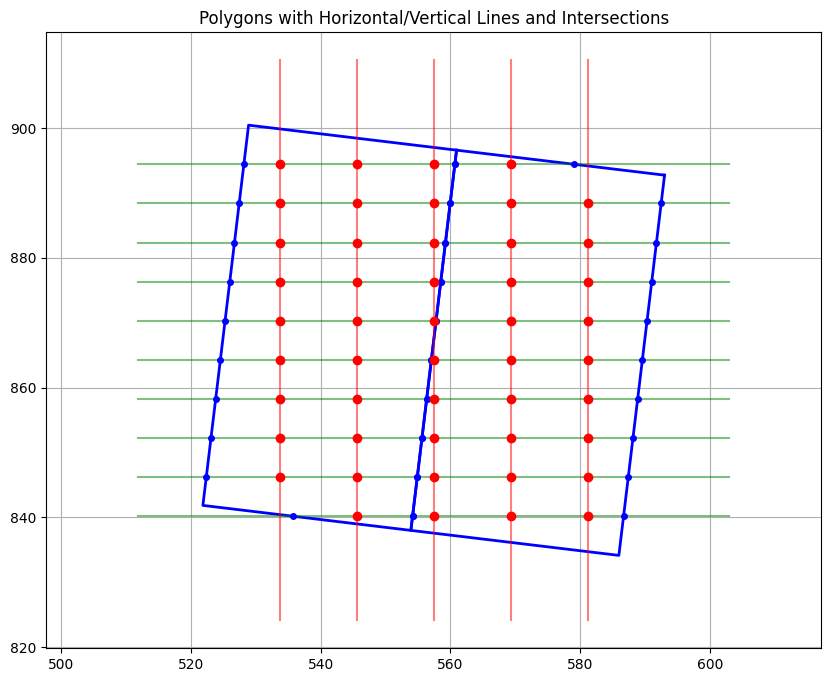

Polygon-Horizontal Line Intersections:
Point 1: (554.16, 840.17)
Point 2: (586.67, 840.17)
Point 3: (554.88, 846.20)
Point 4: (587.40, 846.20)
Point 5: (555.61, 852.23)
Point 6: (588.12, 852.23)
Point 7: (556.33, 858.26)
Point 8: (588.85, 858.26)
Point 9: (557.05, 864.28)
Point 10: (589.57, 864.28)
Point 11: (557.78, 870.31)
Point 12: (590.29, 870.31)
Point 13: (558.50, 876.34)
Point 14: (591.02, 876.34)
Point 15: (559.23, 882.37)
Point 16: (591.74, 882.37)
Point 17: (559.95, 888.39)
Point 18: (592.47, 888.39)
Point 19: (560.68, 894.42)
Point 20: (579.04, 894.42)
Point 21: (535.79, 840.17)
Point 22: (554.16, 840.17)
Point 23: (522.37, 846.20)
Point 24: (554.88, 846.20)
Point 25: (523.09, 852.23)
Point 26: (555.61, 852.23)
Point 27: (523.81, 858.26)
Point 28: (556.33, 858.26)
Point 29: (524.54, 864.28)
Point 30: (557.05, 864.28)
Point 31: (525.26, 870.31)
Point 32: (557.78, 870.31)
Point 33: (525.99, 876.34)
Point 34: (558.50, 876.34)
Point 35: (526.71, 882.37)
Point 36: (559.23, 882.37

In [34]:
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np



polygon_coords = [
    [
        (592.9903884884368, 892.7448093345067),
        (585.9486479366503, 834.1474683142833),
        (553.895635463677, 837.9993324741245),
        (560.9373760154635, 896.596673494349)
    ],
    [
        (560.9373760154635, 896.596673494349),
        (553.895635463677, 837.9993324741245),
        (521.8426229907037, 841.851196633967),
        (528.8843635424902, 900.4485376541913)
    ]
]


polygons = [Polygon(coords) for coords in polygon_coords]


min_x = min(min(x for x, y in poly) for poly in polygon_coords)
max_x = max(max(x for x, y in poly) for poly in polygon_coords)
min_y = min(min(y for x, y in poly) for poly in polygon_coords)
max_y = max(max(y for x, y in poly) for poly in polygon_coords)

num_h_lines = 10
h_interval = (max_y - min_y) / (num_h_lines + 1)
horizontal_lines = []
for i in range(1, num_h_lines + 1):
    y = min_y + i * h_interval
    line = LineString([(min_x - 10, y), (max_x + 10, y)])
    horizontal_lines.append(line)


num_v_lines = 5  
v_interval = (max_x - min_x) / (num_v_lines + 1)
vertical_lines = []
for i in range(1, num_v_lines + 1):
    x = min_x + i * v_interval
    line = LineString([(x, min_y - 10), (x, max_y + 10)])
    vertical_lines.append(line)

intersection_points = []


for polygon in polygons:
    for h_line in horizontal_lines:
        if polygon.intersects(h_line):
            intersection = polygon.intersection(h_line)
            if intersection.geom_type == 'LineString':
                for x, y in intersection.coords:
                    intersection_points.append((x, y))
            elif intersection.geom_type == 'MultiLineString':
                for line in intersection:
                    for x, y in line.coords:
                        intersection_points.append((x, y))

h_v_intersections = []
for polygon in polygons:
    for h_line in horizontal_lines:
        for v_line in vertical_lines:
            h_v_point = h_line.intersection(v_line)
            if polygon.contains(h_v_point):
                h_v_intersections.append((h_v_point.x, h_v_point.y))


plt.figure(figsize=(10, 8))


for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'b-', linewidth=2)


for line in horizontal_lines:
    x, y = line.xy
    plt.plot(x, y, 'g-', alpha=0.5)


for line in vertical_lines:
    x, y = line.xy
    plt.plot(x, y, 'r-', alpha=0.5)


for point in intersection_points:
    plt.plot(point[0], point[1], 'bo', markersize=4)

# Draw horizontal-vertical intersections with a different marker
for point in h_v_intersections:
    plt.plot(point[0], point[1], 'ro', markersize=6)

plt.axis('equal')
plt.title('Polygons with Horizontal/Vertical Lines and Intersections')
plt.grid(True)
plt.show()

# Print intersection points
print("Polygon-Horizontal Line Intersections:")
for i, point in enumerate(intersection_points):
    print(f"Point {i+1}: ({point[0]:.2f}, {point[1]:.2f})")

print("\nHorizontal-Vertical Line Intersections inside Polygons:")
for i, point in enumerate(h_v_intersections):
    print(f"Point {i+1}: ({point[0]:.2f}, {point[1]:.2f})")

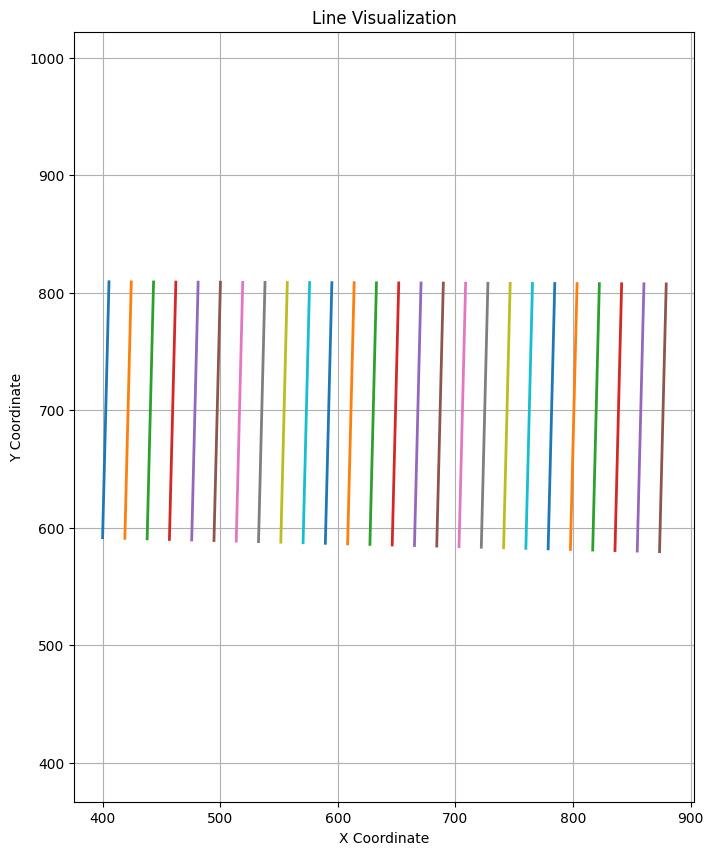

In [35]:

rafter_lines = [
        [
            [
                399.8292320535389,
                591.5782198981952
            ],
            [
                405.2722055074519,
                809.2971580546644
            ]
        ],
        [
            [
                418.78114854998904,
                591.104421985784
            ],
            [
                424.2341471876356,
                809.2243674915926
            ]
        ],
        [
            [
                437.73306504643915,
                590.6306240733727
            ],
            [
                443.1960888678191,
                809.1515769285209
            ]
        ],
        [
            [
                456.6849815428894,
                590.1568261609615
            ],
            [
                462.15803054800284,
                809.0787863654491
            ]
        ],
        [
            [
                475.6368980393395,
                589.6830282485503
            ],
            [
                481.1199722281865,
                809.0059958023775
            ]
        ],
        [
            [
                494.58881453578965,
                589.209230336139
            ],
            [
                500.08191390837015,
                808.9332052393057
            ]
        ],
        [
            [
                513.5407310322398,
                588.7354324237277
            ],
            [
                519.0438555885538,
                808.860414676234
            ]
        ],
        [
            [
                532.49264752869,
                588.2616345113165
            ],
            [
                538.0057972687374,
                808.7876241131622
            ]
        ],
        [
            [
                551.4445640251402,
                587.7878365989052
            ],
            [
                556.967738948921,
                808.7148335500905
            ]
        ],
        [
            [
                570.3964805215903,
                587.314038686494
            ],
            [
                575.9296806291047,
                808.6420429870188
            ]
        ],
        [
            [
                589.3483970180405,
                586.8402407740826
            ],
            [
                594.8916223092883,
                808.5692524239471
            ]
        ],
        [
            [
                608.3003135144907,
                586.3664428616714
            ],
            [
                613.853563989472,
                808.4964618608753
            ]
        ],
        [
            [
                627.2522300109408,
                585.8926449492602
            ],
            [
                632.8155056696557,
                808.4236712978036
            ]
        ],
        [
            [
                646.204146507391,
                585.4188470368489
            ],
            [
                651.7774473498393,
                808.350880734732
            ]
        ],
        [
            [
                665.156063003841,
                584.9450491244377
            ],
            [
                670.7393890300231,
                808.2780901716602
            ]
        ],
        [
            [
                684.1079795002912,
                584.4712512120265
            ],
            [
                689.7013307102067,
                808.2052996085885
            ]
        ],
        [
            [
                703.0598959967413,
                583.9974532996151
            ],
            [
                708.6632723903903,
                808.1325090455167
            ]
        ],
        [
            [
                722.0118124931914,
                583.5236553872039
            ],
            [
                727.6252140705739,
                808.059718482445
            ]
        ],
        [
            [
                740.9637289896416,
                583.0498574747926
            ],
            [
                746.5871557507575,
                807.9869279193733
            ]
        ],
        [
            [
                759.9156454860918,
                582.5760595623814
            ],
            [
                765.5490974309412,
                807.9141373563016
            ]
        ],
        [
            [
                778.8675619825419,
                582.1022616499702
            ],
            [
                784.5110391111248,
                807.8413467932298
            ]
        ],
        [
            [
                797.8194784789921,
                581.6284637375588
            ],
            [
                803.4729807913085,
                807.7685562301581
            ]
        ],
        [
            [
                816.7713949754421,
                581.1546658251476
            ],
            [
                822.434922471492,
                807.6957656670864
            ]
        ],
        [
            [
                835.7233114718922,
                580.6808679127364
            ],
            [
                841.3968641516757,
                807.6229751040147
            ]
        ],
        [
            [
                854.6752279683425,
                580.2070700003251
            ],
            [
                860.3588058318593,
                807.550184540943
            ]
        ],
        [
            [
                873.6271444647925,
                579.7332720879139
            ],
            [
                879.3207475120429,
                807.4773939778712
            ]
        ]
    ]




import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 10))


for line in rafter_lines:
    x_coords = [point[0] for point in line]
    y_coords = [point[1] for point in line]
    plt.plot(x_coords, y_coords, '-', linewidth=2)


plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Line Visualization')

plt.grid(True)

plt.axis('equal')

plt.show()


C:\Users\IL010549\AppData\Local\Temp\ipykernel_6084\42478013.py:241: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


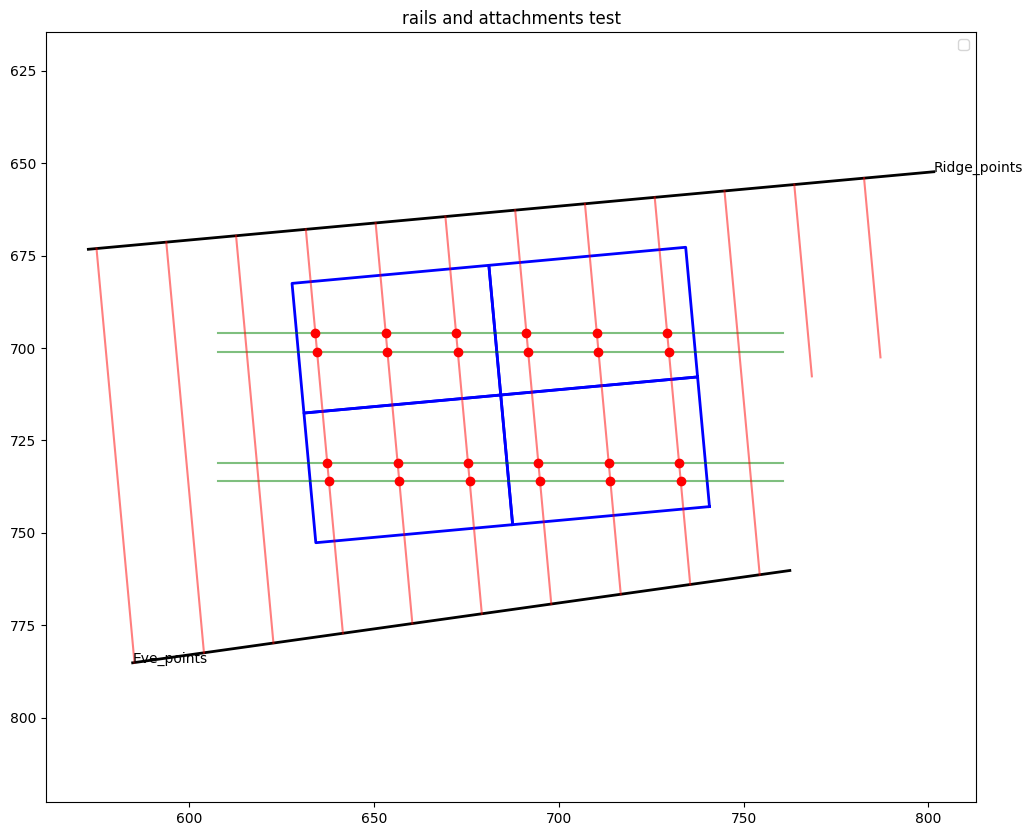

the points are  [(729.3120340558271, 696.077782694185), (710.2746347563644, 696.077782694185), (691.2372354569017, 696.077782694185), (729.7599218070599, 700.9615890712696), (710.7225225075972, 700.9615890712696), (691.6851232081343, 700.9615890712696), (672.1998361574389, 696.077782694185), (653.1624368579762, 696.077782694185), (634.1250375585134, 696.077782694185), (672.6477239086717, 700.9615890712696), (653.6103246092089, 700.9615890712696), (634.5729253097462, 700.9615890712696), (732.5294308714546, 731.1605529698269), (713.4920315719919, 731.1605529698269), (694.454632272529, 731.1605529698269), (732.9773186226873, 736.0443593469115), (713.9399193232247, 736.0443593469115), (694.9025200237618, 736.0443593469115), (675.4172329730663, 731.1605529698269), (656.3798336736036, 731.1605529698269), (637.3424343741409, 731.1605529698269), (675.8651207242991, 736.0443593469115), (656.8277214248363, 736.0443593469115), (637.7903221253737, 736.0443593469115)]


In [36]:
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np




#TODO : 
# first plot the polygon points and the rafter lines 
# draw parallel lines (horizontal) 2 lines each polygon
# the parallel lines should be in the angle of the ridge_points
# mark the 
#REFACTOR:  
# the intersection points should be on the start and end of the plane with the modules
# the horizondal line should be 25% from the start and 25% from the end 



# portrait_formula : 9.8 * cos(pitch)
# landscape_formula : 22.6 * cos(pitch)

module_orientation = "landscape"
polygon_coords = [
    [
        (737.5289670029157, 707.8383607522512),
        (734.3115701872882, 672.7555904766095),
        (681.0581274146199, 677.639396853694),
        (684.2755242302474, 712.722167129336),
    ],
    [
        (684.2755242302474, 712.722167129336),
        (681.0581274146199, 677.639396853694),
        (627.8046846419517, 682.5232032307786),
        (631.0220814575791, 717.6059735064207),
    ],
    [
        (740.7463638185432, 742.9211310278939),
        (737.5289670029157, 707.838360752251),
        (684.2755242302472, 712.7221671293355),
        (687.4929210458748, 747.8049374049787),
    ],
    [
        (687.4929210458748, 747.8049374049787),
        (684.2755242302472, 712.7221671293355),
        (631.022081457579, 717.6059735064209),
        (634.2394782732066, 752.6887437820634),
    ],
]


after_firesetback_points = [
    [563.4131960920918, 683.849716230086],
    [571.2566964320002, 755.1586873236586],
    [721.4685234571397, 734.9041510984856],
    [718.5632461220539, 690.3538023020934],
    [758.5022503287624, 680.3684319624299],
    [757.2853517793179, 662.1138215783843],
    [563.4131960920918, 683.849716230086],
]



ridge_points = (
    [[801.448703847506, 652.3204787645773], [572.7011922497333, 673.298625861141]],
)
eve_points = (
    [[584.6879614164287, 785.1820770428143], [762.4917040557457, 760.208092404048]],
)


rafter_lines = [
    [[782.5700830713754, 654.0518133738835], [787.0169586488396, 702.5409253077241]],
    [[763.6914622952448, 655.7831479831898], [768.4505487273535, 707.6766338002399]],
    [[744.8128415191143, 657.514482592496], [754.3358016835114, 761.353655357538]],
    [[725.9342207429837, 659.2458172018023], [735.5405090690848, 763.9936073746672]],
    [[707.0555999668532, 660.9771518111086], [716.7452164546582, 766.6335593917966]],
    [[688.1769791907225, 662.7084864204148], [697.9499238402316, 769.2735114089259]],
    [[669.2983584145919, 664.4398210297212], [679.1546312258051, 771.9134634260552]],
    [[650.4197376384614, 666.1711556390275], [660.3593386113785, 774.5534154431845]],
    [[631.5411168623308, 667.9024902483337], [641.564045996952, 777.1933674603138]],
    [[612.6624960862002, 669.63382485764], [622.7687533825255, 779.8333194774431]],
    [[593.7838753100697, 671.3651594669462], [603.9734607680989, 782.4732714945724]],
    [[574.9052545339391, 673.0964940762525], [585.1781681536723, 785.1132235117018]],
]

# Create polygon objects
polygons = [Polygon(coords) for coords in polygon_coords]

# Calculate polygon boundaries
min_x = min(min(x for x, y in poly) for poly in polygon_coords)
max_x = max(max(x for x, y in poly) for poly in polygon_coords)
min_y = min(min(y for x, y in poly) for poly in polygon_coords)
max_y = max(max(y for x, y in poly) for poly in polygon_coords)

# Create vertical line segments as LineString objects
vertical_lines = []
for segment in rafter_lines:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    vertical_lines.append(line)



# rafter and eve line segements


new_ridge_lines = []
new_eve_lines = []
for segment in ridge_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_ridge_lines.append(line)




for segment in eve_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_eve_lines.append(line)
# # Create exactly 2 horizontal lines per polygon - FIXED CODE

# FIXME : rail lines draw
# RECHECK: recheck requied on the rails with 2 lines per polygon
horizontal_lines = []
for poly_coords in polygon_coords:
    
    # Get y-coordinates of the polygon
    y_coords = [y for _, y in poly_coords]
    poly_min_y = min(y_coords)
    poly_max_y = max(y_coords)
    
    # Create 2 evenly spaced horizontal lines within this specific polygon's y-range
    y1 = poly_min_y + (poly_max_y - poly_min_y) / 3  # At 1/3 of height
    # y2 = poly_min_y + 2 * (poly_max_y - poly_min_y) / 3  # At 2/3 of height
    
    # Determine x-range (extend beyond the polygon)
    leftmost_x = min(min(x for x, _ in poly_coords) for poly_coords in polygon_coords) - 20
    rightmost_x = max(max(x for x, _ in poly_coords) for poly_coords in polygon_coords) + 20
    
    # Create the horizontal lines
    line1 = LineString([(leftmost_x, y1 + 10), (rightmost_x, y1 + 10)])
    # line2 = LineString([(leftmost_x, y2), (rightmost_x, y2)])
    
    horizontal_lines.append(line1)
    # horizontal_lines.append(line2)


# num_h_lines = 10
# h_interval = (max_y - min_y) / (num_h_lines + 1)
# horizontal_lines = []
# for i in range(1, num_h_lines + 1):
#     y = min_y + i * h_interval
#     line = LineString([(min_x - 10, y), (max_x + 10, y)])
#     horizontal_lines.append(line)


# Find all intersection points between polygons and horizontal lines
intersection_points = []
for polygon in polygons:
    for h_line in horizontal_lines:
        if polygon.intersects(h_line):
            intersection = polygon.intersection(h_line)
            if intersection.geom_type == 'LineString':
                for x, y in intersection.coords:
                    intersection_points.append((x, y))
            elif intersection.geom_type == 'MultiLineString':
                for line in intersection:
                    for x, y in line.coords:
                        intersection_points.append((x, y))

h_v_intersections = []
for polygon in polygons:
    for h_line in horizontal_lines:
        for v_line in vertical_lines:
            h_v_point = h_line.intersection(v_line)
            if polygon.contains(h_v_point):
                h_v_intersections.append((h_v_point.x, h_v_point.y))


plt.figure(figsize=(12, 10))

# Plot polygons
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'b-', linewidth=2)


# plot the ridge points

for points in new_ridge_lines:
    x , y = points.xy
    plt.plot(x, y, 'k-', linewidth=2 )
    plt.text(x[0], y[0], 'Ridge_points', fontsize=10)


# for points_value in after_firesetback_points:
#     plt.plot(points_value[0], points_value[1], 'bo', markersize=4)
#     plt.text(points_value[0], points_value[1], 'fsd_point', fontsize=10)


# the eve points are as foloows
for points in new_eve_lines:
    x , y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Eve_points', fontsize=10)


# Plot horizontal lines
for line in horizontal_lines:
    x, y = line.xy
    plt.plot(x, y, 'g-', alpha=0.5)

# Plot vertical lines
for line in vertical_lines:
    x, y = line.xy
    plt.plot(x, y, 'r-', alpha=0.5)

# Plot polygon-horizontal line intersections
# for point in intersection_points:
#     plt.plot(point[0], point[1], 'bo', markersize=4)

# Plot horizontal-vertical intersections inside polygons
for point in h_v_intersections:
    plt.plot(point[0], point[1], 'ro', markersize=6)

# Fixed line - using rafter_lines instead of vertical_segments
x_values = [coord[0] for poly in polygon_coords for coord in poly] + [seg[0][0] for seg in rafter_lines] + [seg[1][0] for seg in rafter_lines]
y_values = [coord[1] for poly in polygon_coords for coord in poly] + [seg[0][1] for seg in rafter_lines] + [seg[1][1] for seg in rafter_lines]

# Set plot limits with some padding
plt.xlim(min(x_values) - 50, max(x_values) + 50)
plt.ylim(min(y_values) - 50, max(y_values) + 50)





plt.title('rails and attachments test')
plt.grid(False)
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis() 
plt.show()




attachement_points  = [item for item in h_v_intersections]

print("the points are " ,attachement_points)


# EXPERIMENT 2

In [38]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\IL010549\AppData\Local\Temp\ipykernel_15848\2092508604.py:588: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


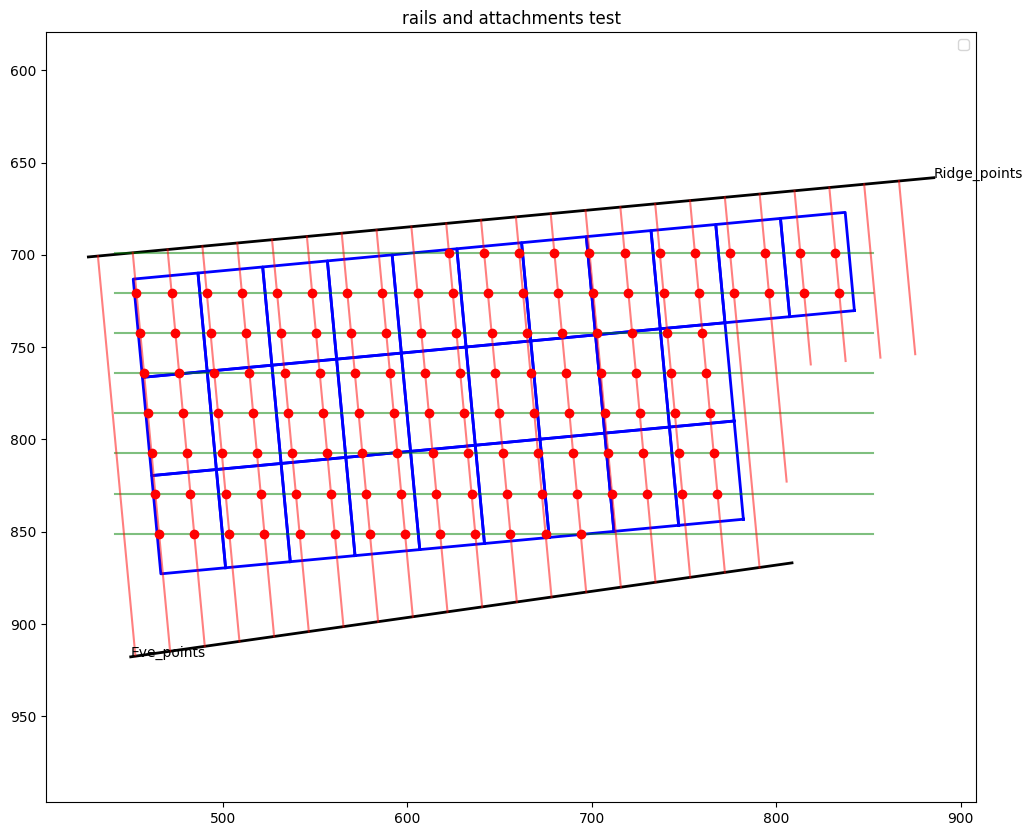

the points are  [(832.0928027426493, 698.6913247713153), (813.0518705902149, 698.6913247713153), (834.1328812496415, 720.4573707084779), (815.0919490972071, 720.4573707084779), (794.0109384377804, 698.6913247713153), (774.9700062853459, 698.6913247713153), (796.0510169447726, 720.4573707084779), (777.0100847923381, 720.4573707084779), (755.9290741329113, 698.6913247713153), (736.8881419804768, 698.6913247713153), (757.9691526399035, 720.4573707084779), (738.928220487469, 720.4573707084779), (717.8472098280424, 698.6913247713153), (698.8062776756078, 698.6913247713153), (719.8872883350348, 720.4573707084779), (700.8463561826001, 720.4573707084779), (702.8864346895923, 742.2234166456404), (679.7653455231734, 698.6913247713153), (681.8054240301657, 720.4573707084779), (683.8455025371579, 742.2234166456404), (660.724413370739, 698.6913247713153), (641.6834812183045, 698.6913247713153), (662.7644918777312, 720.4573707084779), (643.7235597252967, 720.4573707084779), (664.8045703847234, 742.2

In [3]:
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np




#TODO : 
# first plot the polygon points and the rafter lines 
# draw parallel lines (horizontal) 2 lines each polygon
# the parallel lines should be in the angle of the ridge_points
# mark the 
#REFACTOR:  
# the intersection points should be on the start and end of the plane with the modules
# the horizondal line should be 25% from the start and 25% from the end 



# portrait_formula : 9.8 * cos(pitch)
# landscape_formula : 22.6 * cos(pitch)

module_orientation = "portrait"
lancscape_coords = [
    [
        [822.5074776674039, 713.7043146606048],
        [819.2198652862223, 678.6280556504153],
        [765.9763062057334, 683.6184448478589],
        [769.2639185869148, 718.6947038580483],
    ],
    [
        [769.2639185869148, 718.6947038580483],
        [765.9763062057334, 683.6184448478589],
        [712.7327471252441, 688.6088340453025],
        [716.0203595064256, 723.6850930554917],
    ],
    [
        [716.0203595064256, 723.6850930554917],
        [712.7327471252441, 688.6088340453025],
        [659.489188044755, 693.5992232427461],
        [662.7768004259365, 728.6754822529352],
    ],
    [
        [662.7768004259365, 728.6754822529352],
        [659.489188044755, 693.5992232427461],
        [606.2456289642658, 698.5896124401888],
        [609.5332413454473, 733.6658714503786],
    ],
    [
        [609.5332413454473, 733.6658714503786],
        [606.2456289642658, 698.5896124401888],
        [553.0020698837767, 703.5800016376324],
        [556.2896822649582, 738.6562606478221],
    ],
    [
        [556.2896822649582, 738.6562606478221],
        [553.0020698837767, 703.5800016376324],
        [499.75851080328766, 708.5703908350761],
        [503.04612318446914, 743.6466498452655],
    ],
    [
        [503.04612318446914, 743.6466498452655],
        [499.75851080328766, 708.5703908350761],
        [446.5149517227985, 713.5607800325197],
        [449.80256410398, 748.6370390427089],
    ],
    [
        [772.5515309680961, 753.7709628682376],
        [769.2639185869147, 718.6947038580474],
        [716.0203595064256, 723.6850930554929],
        [719.307971887607, 758.761352065681],
    ],
    [
        [719.307971887607, 758.761352065681],
        [716.0203595064256, 723.6850930554929],
        [662.7768004259364, 728.6754822529356],
        [666.0644128071178, 763.7517412631245],
    ],
    [
        [666.0644128071178, 763.7517412631245],
        [662.7768004259364, 728.6754822529356],
        [609.5332413454472, 733.6658714503792],
        [612.8208537266287, 768.7421304605679],
    ],
    [
        [612.8208537266287, 768.7421304605679],
        [609.5332413454472, 733.6658714503792],
        [556.2896822649582, 738.6562606478228],
        [559.5772946461395, 773.7325196580114],
    ],
    [
        [559.5772946461395, 773.7325196580114],
        [556.2896822649582, 738.6562606478228],
        [503.04612318446914, 743.6466498452664],
        [506.3337355656505, 778.7229088554548],
    ],
    [
        [506.3337355656505, 778.7229088554548],
        [503.04612318446914, 743.6466498452664],
        [449.80256410398, 748.6370390427101],
        [453.09017648516135, 783.7132980528982],
    ],
    [
        [775.8391433492775, 788.8472218784269],
        [772.551530968096, 753.7709628682369],
        [719.3079718876068, 758.7613520656805],
        [722.5955842687883, 793.8376110758703],
    ],
    [
        [722.5955842687883, 793.8376110758703],
        [719.3079718876068, 758.7613520656805],
        [666.0644128071176, 763.7517412631241],
        [669.3520251882992, 798.8280002733138],
    ],
    [
        [669.3520251882992, 798.8280002733138],
        [666.0644128071176, 763.7517412631241],
        [612.8208537266286, 768.7421304605668],
        [616.10846610781, 803.8183894707572],
    ],
    [
        [616.10846610781, 803.8183894707572],
        [612.8208537266286, 768.7421304605668],
        [559.5772946461394, 773.7325196580105],
        [562.8649070273209, 808.8087786682007],
    ],
    [
        [562.8649070273209, 808.8087786682007],
        [559.5772946461394, 773.7325196580105],
        [506.33373556565033, 778.7229088554541],
        [509.62134794683186, 813.7991678656441],
    ],
    [
        [509.62134794683186, 813.7991678656441],
        [506.33373556565033, 778.7229088554541],
        [453.0901764851611, 783.7132980528977],
        [456.3777888663427, 818.7895570630875],
    ],
    [
        [779.1267557304589, 823.9234808886162],
        [775.8391433492774, 788.8472218784282],
        [722.5955842687882, 793.8376110758709],
        [725.8831966499697, 828.9138700860597],
    ],
    [
        [725.8831966499697, 828.9138700860597],
        [722.5955842687882, 793.8376110758709],
        [669.3520251882992, 798.8280002733145],
        [672.6396375694806, 833.904259283503],
    ],
    [
        [672.6396375694806, 833.904259283503],
        [669.3520251882992, 798.8280002733145],
        [616.1084661078099, 803.8183894707572],
        [619.3960784889914, 838.8946484809466],
    ],
    [
        [619.3960784889914, 838.8946484809466],
        [616.1084661078099, 803.8183894707572],
        [562.8649070273208, 808.8087786682008],
        [566.1525194085023, 843.88503767839],
    ],
    [
        [566.1525194085023, 843.88503767839],
        [562.8649070273208, 808.8087786682008],
        [509.62134794683175, 813.7991678656435],
        [512.9089603280132, 848.8754268758335],
    ],
    [
        [512.9089603280132, 848.8754268758335],
        [509.62134794683175, 813.7991678656435],
        [456.3777888663426, 818.7895570630876],
        [459.6654012475241, 853.8658160732768],
    ],
    [
        [675.9272499506619, 868.9805182936924],
        [672.6396375694804, 833.904259283503],
        [619.3960784889914, 838.8946484809476],
        [622.6836908701728, 873.9709074911358],
    ],
    [
        [622.6836908701728, 873.9709074911358],
        [619.3960784889914, 838.8946484809476],
        [566.1525194085023, 843.8850376783912],
        [569.4401317896836, 878.9612966885793],
    ],
    [
        [569.4401317896836, 878.9612966885793],
        [566.1525194085023, 843.8850376783912],
        [512.9089603280131, 848.8754268758339],
        [516.1965727091946, 883.9516858860227],
    ],
    [
        [516.1965727091946, 883.9516858860227],
        [512.9089603280131, 848.8754268758339],
        [459.66540124752396, 853.8658160732771],
        [462.95301362870543, 888.9420750834661],
    ],
]


portrait_corods = [
    [
        [842.3775545539658, 730.1688379146426],
        [837.387165356522, 676.9252788341528],
        [802.3109063463328, 680.2128912153348],
        [807.3012955437765, 733.456450295824],
    ],
    [
        [807.3012955437765, 733.456450295824],
        [802.3109063463328, 680.2128912153348],
        [767.2346473361434, 683.500503596515],
        [772.2250365335872, 736.7440626770053],
    ],
    [
        [772.2250365335872, 736.7440626770053],
        [767.2346473361434, 683.500503596515],
        [732.1583883259543, 686.7881159776971],
        [737.1487775233979, 740.0316750581867],
    ],
    [
        [737.1487775233979, 740.0316750581867],
        [732.1583883259543, 686.7881159776971],
        [697.082129315765, 690.0757283588782],
        [702.0725185132086, 743.319287439368],
    ],
    [
        [702.0725185132086, 743.319287439368],
        [697.082129315765, 690.0757283588782],
        [662.0058703055756, 693.3633407400603],
        [666.9962595030192, 746.6068998205494],
    ],
    [
        [666.9962595030192, 746.6068998205494],
        [662.0058703055756, 693.3633407400603],
        [626.9296112953864, 696.6509531212414],
        [631.92000049283, 749.8945122017307],
    ],
    [
        [631.92000049283, 749.8945122017307],
        [626.9296112953864, 696.6509531212414],
        [591.853352285197, 699.9385655024225],
        [596.8437414826407, 753.182124582912],
    ],
    [
        [596.8437414826407, 753.182124582912],
        [591.853352285197, 699.9385655024225],
        [556.7770932750077, 703.2261778836037],
        [561.7674824724513, 756.4697369640934],
    ],
    [
        [561.7674824724513, 756.4697369640934],
        [556.7770932750077, 703.2261778836037],
        [521.7008342648185, 706.5137902647857],
        [526.6912234622621, 759.7573493452747],
    ],
    [
        [526.6912234622621, 759.7573493452747],
        [521.7008342648185, 706.5137902647857],
        [486.6245752546291, 709.8014026459668],
        [491.6149644520728, 763.0449617264561],
    ],
    [
        [491.6149644520728, 763.0449617264561],
        [486.6245752546291, 709.8014026459668],
        [451.54831624443983, 713.0890150271489],
        [456.53870544188345, 766.3325741076375],
    ],
    [
        [777.2154257310307, 789.9876217574945],
        [772.225036533587, 736.7440626770049],
        [737.1487775233978, 740.031675058186],
        [742.1391667208414, 793.2752341386758],
    ],
    [
        [742.1391667208414, 793.2752341386758],
        [737.1487775233978, 740.031675058186],
        [702.0725185132084, 743.3192874393671],
        [707.0629077106521, 796.5628465198572],
    ],
    [
        [707.0629077106521, 796.5628465198572],
        [702.0725185132084, 743.3192874393671],
        [666.9962595030191, 746.6068998205492],
        [671.9866487004628, 799.8504589010385],
    ],
    [
        [671.9866487004628, 799.8504589010385],
        [666.9962595030191, 746.6068998205492],
        [631.9200004928297, 749.8945122017303],
        [636.9103896902734, 803.1380712822198],
    ],
    [
        [636.9103896902734, 803.1380712822198],
        [631.9200004928297, 749.8945122017303],
        [596.8437414826406, 753.1821245829115],
        [601.8341306800842, 806.4256836634012],
    ],
    [
        [601.8341306800842, 806.4256836634012],
        [596.8437414826406, 753.1821245829115],
        [561.7674824724513, 756.4697369640926],
        [566.7578716698949, 809.7132960445825],
    ],
    [
        [566.7578716698949, 809.7132960445825],
        [561.7674824724513, 756.4697369640926],
        [526.691223462262, 759.7573493452746],
        [531.6816126597056, 813.0009084257639],
    ],
    [
        [531.6816126597056, 813.0009084257639],
        [526.691223462262, 759.7573493452746],
        [491.6149644520726, 763.0449617264558],
        [496.60535364951625, 816.2885208069453],
    ],
    [
        [496.60535364951625, 816.2885208069453],
        [491.6149644520726, 763.0449617264558],
        [456.53870544188334, 766.3325741076378],
        [461.52909463932696, 819.5761331881266],
    ],
    [
        [782.2058149284741, 843.2311808379836],
        [777.2154257310305, 789.9876217574938],
        [742.139166720841, 793.2752341386749],
        [747.1295559182847, 846.518793219165],
    ],
    [
        [747.1295559182847, 846.518793219165],
        [742.139166720841, 793.2752341386749],
        [707.0629077106519, 796.5628465198579],
        [712.0532969080955, 849.8064056003464],
    ],
    [
        [712.0532969080955, 849.8064056003464],
        [707.0629077106519, 796.5628465198579],
        [671.9866487004625, 799.850458901039],
        [676.9770378979061, 853.0940179815277],
    ],
    [
        [676.9770378979061, 853.0940179815277],
        [671.9866487004625, 799.850458901039],
        [636.9103896902732, 803.1380712822192],
        [641.9007788877168, 856.381630362709],
    ],
    [
        [641.9007788877168, 856.381630362709],
        [636.9103896902732, 803.1380712822192],
        [601.834130680084, 806.4256836634013],
        [606.8245198775276, 859.6692427438903],
    ],
    [
        [606.8245198775276, 859.6692427438903],
        [601.834130680084, 806.4256836634013],
        [566.7578716698946, 809.7132960445815],
        [571.7482608673383, 862.9568551250717],
    ],
    [
        [571.7482608673383, 862.9568551250717],
        [566.7578716698946, 809.7132960445815],
        [531.6816126597053, 813.0009084257626],
        [536.672001857149, 866.244467506253],
    ],
    [
        [536.672001857149, 866.244467506253],
        [531.6816126597053, 813.0009084257626],
        [496.60535364951613, 816.2885208069456],
        [501.5957428469597, 869.5320798874344],
    ],
    [
        [501.5957428469597, 869.5320798874344],
        [496.60535364951613, 816.2885208069456],
        [461.5290946393267, 819.5761331881258],
        [466.51948383677035, 872.8196922686158],
    ],
]




ridge_points = (
    [[885.4151069433566, 658.1430376552173],
    [427.2352488971326, 701.0871205371207]],
)
eve_points = (
    [[450.19415245936176, 917.8049341504471],
    [808.552690669807, 866.8712544533059]],
)

after_set_back_points = [
    [442.8906323590193, 713.9004786648696],
    [462.7811529560261, 901.6546596835915],
    [793.4966910830967, 854.6498935241202],
    [786.4704153383078, 748.2001587268123],
    [878.043673226332, 739.2375401118809],
    [872.4634243667117, 673.6376664529721],
    [442.8906323590193, 713.9004786648696],
]




polygon_coords = lancscape_coords if module_orientation == 'landscape' else portrait_corods

rafter_lines = [
    [[866.5399899872009, 659.9121564253597], [875.338800284868, 753.7885971971191]],
    [[847.6648730310452, 661.6812751955022], [856.470951752996, 755.6352643833216]],
    [[828.7897560748895, 663.4503939656446], [837.6031032211243, 757.481931569524]],
    [[809.9146391187339, 665.219512735787], [818.7352546892527, 759.3285987557256]],
    [[791.0395221625782, 666.9886315059294], [805.6446941332941, 822.8144210258861]],
    [[772.1644052064225, 668.7577502760719], [790.967365465647, 869.3706655899614]],
    [[753.2892882502668, 670.5268690462143], [772.1767533211356, 872.041384767077]],
    [[734.4141712941112, 672.2959878163567], [753.3861411766243, 874.7121039441926]],
    [[715.5390543379556, 674.0651065864992], [734.5955290321131, 877.3828231213082]],
    [[696.6639373817998, 675.8342253566416], [715.8049168876015, 880.0535422984238]],
    [[677.7888204256442, 677.603344126784], [697.0143047430903, 882.7242614755394]],
    [[658.9137034694885, 679.3724628969264], [678.2236925985789, 885.394980652655]],
    [[640.0385865133328, 681.1415816670689], [659.4330804540676, 888.0656998297707]],
    [[621.1634695571772, 682.9107004372113], [640.6424683095562, 890.7364190068863]],
    [[602.2883526010215, 684.6798192073537], [621.8518561650449, 893.4071381840018]],
    [[583.4132356448658, 686.4489379774961], [603.0612440205334, 896.0778573611175]],
    [[564.5381186887103, 688.2180567476386], [584.2706318760222, 898.748576538233]],
    [[545.6630017325544, 689.987175517781], [565.4800197315108, 901.4192957153487]],
    [[526.7878847763989, 691.7562942879234], [546.6894075869994, 904.0900148924643]],
    [[507.9127678202432, 693.5254130580659], [527.8987954424881, 906.7607340695799]],
    [[489.03765086408754, 695.2945318282083], [509.1081832979767, 909.4314532466955]],
    [[470.1625339079319, 697.0636505983507], [490.31757115346545, 912.1021724238111]],
    [[451.2874169517762, 698.8327693684931], [471.52695900895407, 914.7728916009268]],
    [[432.4122999956206, 700.6018881386356], [452.73634686444274, 917.4436107780423]],
]


# Create polygon objects
polygons = [Polygon(coords) for coords in polygon_coords]

# Calculate polygon boundaries
min_x = min(min(x for x, y in poly) for poly in polygon_coords)
max_x = max(max(x for x, y in poly) for poly in polygon_coords)
min_y = min(min(y for x, y in poly) for poly in polygon_coords)
max_y = max(max(y for x, y in poly) for poly in polygon_coords)

# Create vertical line segments as LineString objects
vertical_lines = []
for segment in rafter_lines:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    vertical_lines.append(line)



# rafter and eve line segements


new_ridge_lines = []
new_eve_lines = []
for segment in ridge_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_ridge_lines.append(line)




for segment in eve_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_eve_lines.append(line)
# # Create exactly 2 horizontal lines per polygon - FIXED CODE

# FIXME : rail lines draw
# RECHECK: recheck requied on the rails with 2 lines per polygon
# horizontal_lines = []
# for poly_coords in polygon_coords:
    
#     # Get y-coordinates of the polygon
#     y_coords = [y for _, y in poly_coords]
#     poly_min_y = min(y_coords)
#     poly_max_y = max(y_coords)
    
#     # Create 2 evenly spaced horizontal lines within this specific polygon's y-range
#     y1 = poly_min_y + (poly_max_y - poly_min_y) / 3  # At 1/3 of height
#     # y2 = poly_min_y + 2 * (poly_max_y - poly_min_y) / 3  # At 2/3 of height
    
#     # Determine x-range (extend beyond the polygon)
#     leftmost_x = min(min(x for x, _ in poly_coords) for poly_coords in polygon_coords) - 20
#     rightmost_x = max(max(x for x, _ in poly_coords) for poly_coords in polygon_coords) + 20
    
#     # Create the horizontal lines
#     line1 = LineString([(leftmost_x, y1 + 10), (rightmost_x, y1 + 10)])
#     # line2 = LineString([(leftmost_x, y2), (rightmost_x, y2)])
    
#     horizontal_lines.append(line1)
#     # horizontal_lines.append(line2)


num_h_lines = 8
h_interval = (max_y - min_y) / (num_h_lines + 1)
horizontal_lines = []
for i in range(1, num_h_lines + 1):
    y = min_y + i * h_interval
    line = LineString([(min_x - 10, y), (max_x + 10, y)])
    horizontal_lines.append(line)


# Find all intersection points between polygons and horizontal lines
intersection_points = []
for polygon in polygons:
    for h_line in horizontal_lines:
        if polygon.intersects(h_line):
            intersection = polygon.intersection(h_line)
            if intersection.geom_type == 'LineString':
                for x, y in intersection.coords:
                    intersection_points.append((x, y))
            elif intersection.geom_type == 'MultiLineString':
                for line in intersection:
                    for x, y in line.coords:
                        intersection_points.append((x, y))

h_v_intersections = []
for polygon in polygons:
    for h_line in horizontal_lines:
        for v_line in vertical_lines:
            h_v_point = h_line.intersection(v_line)
            if polygon.contains(h_v_point):
                h_v_intersections.append((h_v_point.x, h_v_point.y))


plt.figure(figsize=(12, 10))

# Plot polygons
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'b-', linewidth=2)


# plot the ridge points

for points in new_ridge_lines:
    x , y = points.xy
    plt.plot(x, y, 'k-', linewidth=2 )
    plt.text(x[0], y[0], 'Ridge_points', fontsize=10)


# for points_value in after_firesetback_points:
#     plt.plot(points_value[0], points_value[1], 'bo', markersize=4)
#     plt.text(points_value[0], points_value[1], 'fsd_point', fontsize=10)


# the eve points are as foloows
for points in new_eve_lines:
    x , y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Eve_points', fontsize=10)


# Plot horizontal lines
for line in horizontal_lines:
    x, y = line.xy
    plt.plot(x, y, 'g-', alpha=0.5)

# Plot vertical lines
for line in vertical_lines:
    x, y = line.xy
    plt.plot(x, y, 'r-', alpha=0.5)

# Plot polygon-horizontal line intersections
# for point in intersection_points:
#     plt.plot(point[0], point[1], 'bo', markersize=4)

# Plot horizontal-vertical intersections inside polygons
for point in h_v_intersections:
    plt.plot(point[0], point[1], 'ro', markersize=6)

# Fixed line - using rafter_lines instead of vertical_segments
x_values = [coord[0] for poly in polygon_coords for coord in poly] + [seg[0][0] for seg in rafter_lines] + [seg[1][0] for seg in rafter_lines]
y_values = [coord[1] for poly in polygon_coords for coord in poly] + [seg[0][1] for seg in rafter_lines] + [seg[1][1] for seg in rafter_lines]

# Set plot limits with some padding
plt.xlim(min(x_values) - 50, max(x_values) + 50)
plt.ylim(min(y_values) - 50, max(y_values) + 50)





plt.title('rails and attachments test')
plt.grid(False)
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis() 
plt.show()




attachement_points  = [item for item in h_v_intersections]

print("the points are " ,attachement_points)
